# Multiple subplots and animations with matplotlib
> "Playing with subplots, //, %, and animation"
- show_tags: true
- toc: true
- branch: master
- badges: false
- comments: true
- categories: [matplotlib]

# Subplots

What I want it to display multiple plots, with a given max rows. And to display my plots depending only on these parameters.

In [1]:
from fastai.tabular.all import *

%matplotlib inline

# fastai v1 backward compatibility
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

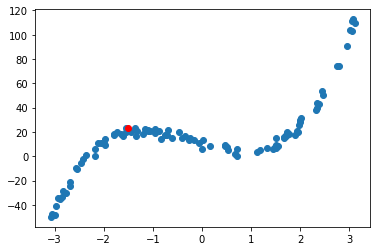

In [3]:
def my_hidden_f(x):
    return 4*x**3+2*x**2-12*x+5+10*torch.rand(x.shape)

n=100
time = torch.ones(n,1) 
time[:,0].uniform_(-3.14,3.14)

speed=my_hidden_f(time)


plt.scatter(time[:,0], speed)
plt.scatter(tensor(-1.5), my_hidden_f(tensor([-1.5])), color='red')

def f(t, params):
    a,b,c,d = params
    return a*(t**3) + (b*t**2) + c*t + d

def mse(preds, targets): return ((preds-targets)**2).mean()

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-50,150)

lr = 1e-4

def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

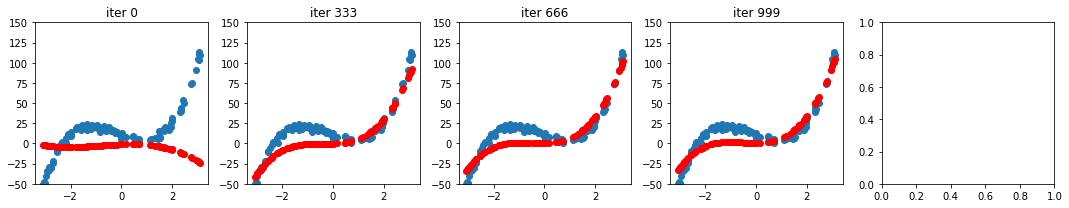

In [4]:
#load initial parameters
params = torch.randn(4).requires_grad_()
#nbr of iterations
max_iter = 1000
#nbr of curves visible
nbr_graph = 4
#max number of curves on one row
max_columns = 5
#nbr of rows
max_rows = (nbr_graph-1) // max_columns + 1
#nbr of iter per plot
graph_iteration = max_iter //(nbr_graph-1)

_,axs = plt.subplots(nrows=max_rows,ncols=max_columns,figsize=(3*max_columns,3*max_rows))

i=-1
ax_index= ((i+1) // graph_iteration ) // (max_columns),  ((i+1) // graph_iteration ) % (max_columns)
if (max_rows ==1): ax_index= ((i+1) // graph_iteration ) % (max_columns)

show_preds(apply_step(params, prn=False), axs[ax_index])
axs[ax_index].set_title('iter 0')

for i in range(max_iter): 
    preds=apply_step(params, prn=False)
    if ((i+1) % graph_iteration == 0):         
        ax_index= ((i+1) // graph_iteration ) // (max_columns),  ((i+1) // graph_iteration ) % (max_columns)
        if (max_rows ==1): ax_index= ((i+1) // graph_iteration ) % (max_columns)
        show_preds(preds, axs[ax_index])
        axs[ax_index].set_title('iter '+str(i+1))
plt.tight_layout()